# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('base_para_modelo.csv')

y = df['mau']
X = df.drop('mau', axis=1)

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

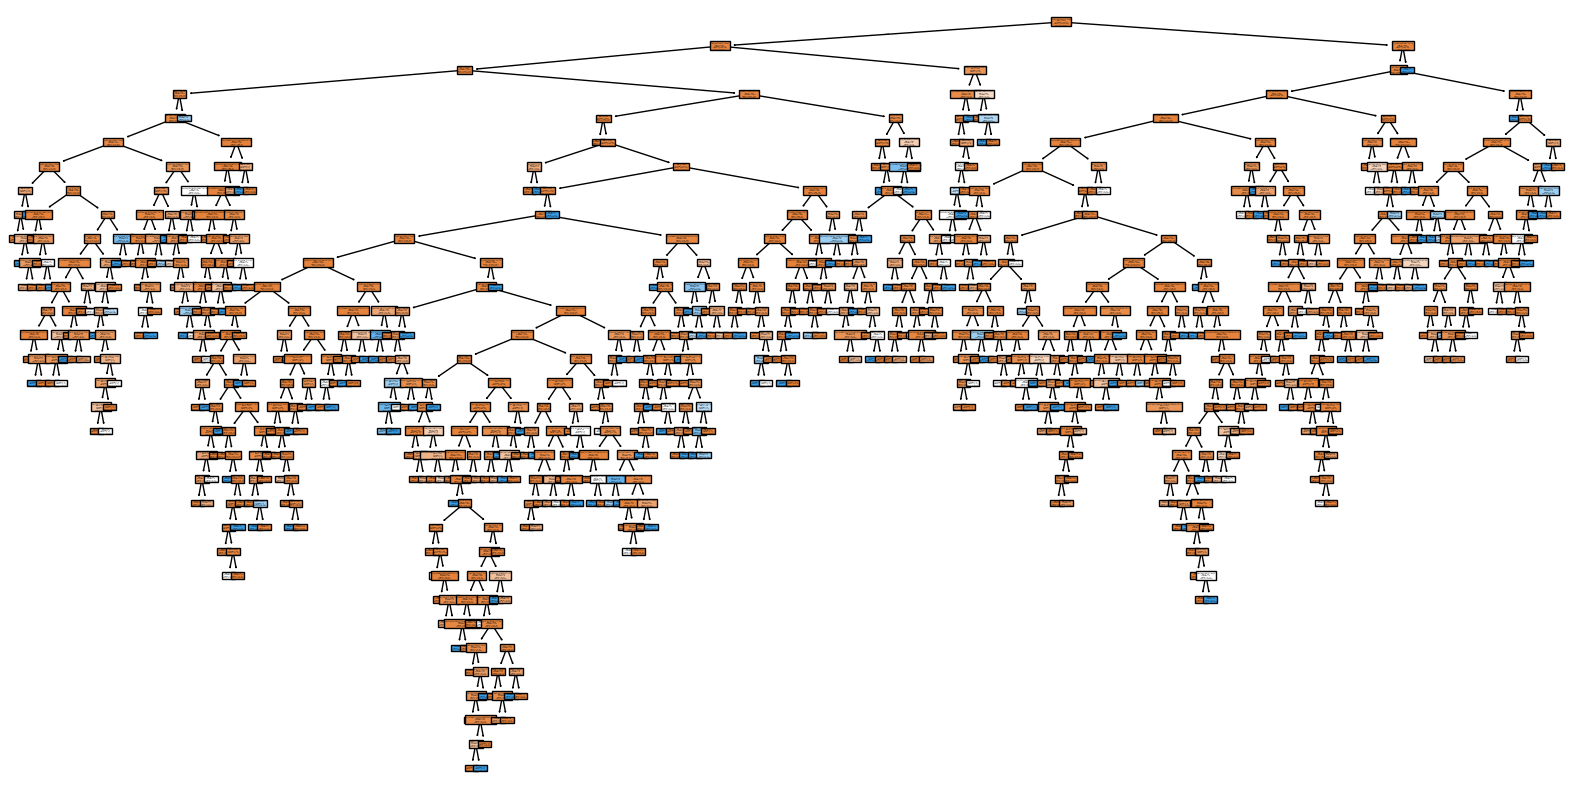

Aprovados previstos: 11357
Reprovados previstos: 196
Erros de aprovação: 86
Erros de reprovação: 16
Acurácia (treino): 0.99


In [15]:
modelo = DecisionTreeClassifier(random_state=42)

modelo.fit(X_treino, y_treino)

plt.figure(figsize=(20, 10))
plot_tree(modelo, filled=True, feature_names=X.columns, class_names=["aprovado", "reprovado"])
plt.show()

previsoes_treino = modelo.predict(X_treino)

print("Aprovados previstos:", sum((previsoes_treino == 0) & (y_treino == 0)))
print("Reprovados previstos:", sum((previsoes_treino == 1) & (y_treino == 1)))
print("Erros de aprovação:", sum((previsoes_treino == 0) & (y_treino == 1)))
print("Erros de reprovação:", sum((previsoes_treino == 1) & (y_treino == 0)))

acuracia_treino = modelo.score(X_treino, y_treino)
print("Acurácia (treino):", round(acuracia_treino, 2))

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [18]:
previsoes_teste = modelo.predict(X_teste)

print("\n--- Matriz de Confusão (Teste) ---")
print("Aprovados previstos corretamente:", sum((previsoes_teste == 0) & (y_teste == 0)))
print("Reprovados previstos corretamente:", sum((previsoes_teste == 1) & (y_teste == 1)))
print("Erros de aprovação:", sum((previsoes_teste == 0) & (y_teste == 1)))
print("Erros de reprovação:", sum((previsoes_teste == 1) & (y_teste == 0)))

acuracia_teste = modelo.score(X_teste, y_teste)
print("\nAcurácia (teste):", round(acuracia_teste, 2))

modelo_limite = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
modelo_limite.fit(X_treino, y_treino)

previsao_limite = modelo_limite.predict(X_teste)

print("\n--- Nova Árvore ---")
print("Reprovados previstos:", sum(previsao_limite == 1))
print("Aprovados previstos:", sum(previsao_limite == 0))

prop_maus = sum(previsao_limite == 1) / len(previsao_limite)
print("Proporção classificados como maus:", round(prop_maus, 2))

todos_bons = [0] * len(y_teste)
acuracia_todos_bons = sum(todos_bons == y_teste.values) / len(y_teste)
print("\nAcurácia se todos forem bons:", round(acuracia_todos_bons, 2))


--- Matriz de Confusão (Teste) ---
Aprovados previstos corretamente: 4813
Reprovados previstos corretamente: 28
Erros de aprovação: 80
Erros de reprovação: 74

Acurácia (teste): 0.97

--- Nova Árvore ---
Reprovados previstos: 32
Aprovados previstos: 4963
Proporção classificados como maus: 0.01

Acurácia se todos forem bons: 0.98
